# Preliminaries

Python version: Python 2.7.12

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler

# Creating data

In [2]:
rawdata = np.genfromtxt('Concrete_Data.csv', delimiter=',',skip_header=1)
scaler = MinMaxScaler()
rawdata = scaler.fit_transform(rawdata)
np.random.shuffle(rawdata)
split = int(len(rawdata)*0.7)
traindata,testdata = rawdata[:split],rawdata[-split:]
X_traindata, X_testdata = traindata[:,:-1], testdata[:,:-1]
Yobv_traindata, Yobv_testdata = (traindata[:,-1]).reshape(len(traindata),-1), (testdata[:,-1]).reshape(len(testdata),-1)

# Obsevations

- The number of hidden nodes have not shown significant effect on the performance of the BP and RProp. However, In case of Quick prop, the performance effect of number of hidden nodes can be observed. As the number of hiiden nodes increased, the performance increased, i.e error decreased.

- The effect of actiavation functions, Tanh and Relu are comparable. In few cases, Relu performed better than Tanh.

- Of all the algorithms, Rprop has shown the highest performance. RProp converges fater than Back Propagation.

- Performance of Back Prop and Quick Prop are comparable. However, Quick Prop converging faster than the Back prop algorithm.

- The eror-epoch curves of both Bp and Rprop are smooth. However, the error curves of quick prop are not smooth.

- Quick Propproduces "uncertain" jumps when the error surface has many local minima, due to the approximation of the loss function and its second derivative.

# Results - Table

The results of all varients of the algorithms are given in below table. The first column shows the Id's of images depicting the train and test mean square error vs epochs graphs given in the next cell.

| Image Id 	| Number of hidden nodes 	| Activation Function 	| Algorithm  	| Train MSE 	| Test MSE 	|
|----------	|------------------------	|---------------------	|------------	|-----------	|----------	|
| 1        	| 25                     	| Tanh                	| BP         	| 0.00597   	| 0.00573  	|
| 2        	| 50                     	| Tanh                	| BP         	| 0.00778   	| 0.00802  	|
| 3        	| 75                     	| Tanh                	| BP         	| 0.00785   	| 0.00859  	|
| 4        	| 25                     	| Relu                	| BP         	| 0.00772   	| 0.00794  	|
| 5        	| 50                     	| Relu                	| BP         	| 0.00706   	| 0.00804  	|
| 6        	| 75                     	| Relu                	| BP         	| 0.00638   	| 0.00629  	|
| 7        	| 25                     	| Tanh                	| RProp      	| 0.00177   	| 0.00199  	|
| 8        	| 50                     	| Tanh                	| RProp      	| 0.00194   	| 0.00218  	|
| 9        	| 75                     	| Tanh                	| RProp      	| 0.00169   	| 0.00197  	|
| 10       	| 25                     	| Relu                	| RProp      	| 0.00167   	| 0.00196  	|
| 11       	| 50                     	| Relu                	| RProp      	| 0.00110   	| 0.00142  	|
| 12       	| 75                     	| Relu                	| RProp      	| 0.00082   	| 0.00146  	|
| 13       	| 25                     	| Tanh                	| Quick Prop 	| 0.021     	| 0.02203  	|
| 14       	| 50                     	| Tanh                	| Quick Prop 	| 0.01868   	| 0.01951  	|
| 15       	| 75                     	| Tanh                	| Quick Prop 	| 0.00523   	| 0.00539  	|
| 16       	| 25                     	| Relu                	| Quick Prop 	| 0.06907   	| 0.07641  	|
| 17       	| 50                     	| Relu                	| Quick Prop 	| 0.00826   	| 0.00813  	|
| 18       	| 75                     	| Relu                	| Quick Prop 	| 0.00839   	| 0.00966  	|

# Results - Graphs

1. <img src="1.png">
2. <img src="2.png">
3. <img src="3.png">
4. <img src="4.png">
5. <img src="5.png">
6. <img src="6.png">
7. <img src="7.png">
8. <img src="8.png">
9. <img src="9.png">
10. <img src="10.png">
11. <img src="11.png">
12. <img src="12.png">
13. <img src="13.png">
14. <img src="14.png">
15. <img src="15.png">
16. <img src="16.png">
17. <img src="17.png">
18. <img src="18.png">

# Back Propagation

('Network config:', 8, 25, 1, 'tanh')
('learning rate:', 0.0001)
('Train MSE:', 0.007710993262841827)
('Test MSE:', 0.008009410776436883)


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


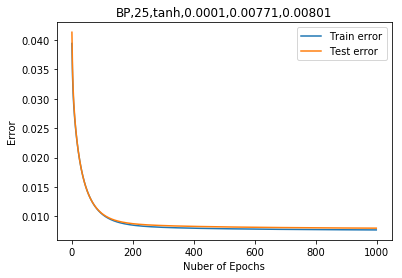

In [3]:
# create a class for neural network
class NN3(object):
    def __init__(self, d,h,c,activation):
        self.d = d
        self.h = h
        self.c = c
        self.activation = activation
        
        print("Network config:",self.d, self.h, self.c, self.activation)
    
        self.w1 = np.random.uniform(low=-0.5, high=0.5, size=(self.d, self.h))

        self.w2 = np.random.uniform(low=-0.5, high=0.5, size=(self.h, self.c))

    
    def sigmoid(self, z):
        return 1./(1.+np.exp(-z))
    
   
    def sigmoidprime(self,z):
        return np.exp(-z)/(1.+np.exp(-z)**2)
    
    def tanh(self,z):
        return np.tanh(z)
    
    def tanhprime(self,z):

        return 1.0 - np.tanh(z)**2
    
    def relu(self,z):
        return np.maximum(0,z)
    
    def reluprime(self,z):
        return np.where(z <= 0., 0., 1.)
    
    def forwardpass(self,X):
        self.z2 = np.dot(X, self.w1)

        if self.activation == "tanh":
            self.a2 = self.tanh(self.z2)
        if self.activation == "relu":
            self.a2 = self.relu(self.z2)

        self.z3 = np.dot(self.a2, self.w2)
        return self.z3
           
    def costfunction(self,X,Y):
        self.Ypred = self.forwardpass(X)
        J = 0.5*np.sum((Y-self.Ypred)**2)
        return J
    
    def get_gradients(self,X,Yobv):
        self.Ypred = self.forwardpass(X)
        delta3 = self.Ypred-Yobv
        djdw2 = np.dot(self.a2.T, delta3)
        if self.activation == "tanh":
            delta2 = np.dot(delta3, self.w2.T)*self.tanhprime(self.z2)
        if self.activation == "relu":
            delta2 = np.dot(delta3, self.w2.T)*self.reluprime(self.z2)
        djdw1 = np.dot(X.T, delta2)
        return djdw1, djdw2    
        

NN = NN3(8,25,1,"tanh")
learningrate = 0.0001
print("learning rate:",learningrate)
max_iterations = 1000
iters = 0
train_error_vals = []
test_error_vals = []

while (iters < max_iterations):
    #forward pass and gradient calculation
    djdw1 = np.zeros(NN.w1.shape)
    djdw2 = np.zeros(NN.w2.shape)
    for i in range(len(traindata)):
        djdw1_i, djdw2_i = NN.get_gradients(np.array([X_traindata[i]]),
                                       np.array([Yobv_traindata[i]]))
        djdw1 = djdw1+djdw1_i
        djdw2 = djdw2+djdw2_i
     
 
    
    #update rule
    NN.w1 = NN.w1 - (learningrate*djdw1)
    NN.w2 = NN.w2 - (learningrate*djdw2)
    
    #Error calculation
    train_error_sum = 0
    for i in range(len(traindata)):
        error = NN.costfunction(np.array([X_traindata[i]]),
                                 np.array([Yobv_traindata[i]]))
        train_error_sum = train_error_sum+error
    train_error_vals.append(train_error_sum/len(traindata))
    
    test_error_sum = 0
    for i in range(len(testdata)):
        error = NN.costfunction(np.array([X_testdata[i]]),
                                 np.array([Yobv_testdata[i]]))
        test_error_sum = test_error_sum+error
    test_error_vals.append(test_error_sum/len(testdata))
        
        
    iters = iters+1
    
print("Train MSE:",train_error_vals[-1])
print("Test MSE:",test_error_vals[-1])


#plotting error-epoch graph
f = plt.figure(0)
plt.title("BP"+","+str(NN.h)+","+NN.activation+","+
          str(learningrate)+","+
          str(round(train_error_vals[-1],5))
          +","+str(round(test_error_vals[-1],5)))
plt.xlabel("Nuber of Epochs")
plt.ylabel("Error")
plt.plot(train_error_vals, label="Train error")
plt.plot(test_error_vals, label="Test error")
plt.legend()
f.show()

# R Prop

Update rule:

<img src="rprop.png">

('Network config:', 8, 75, 1, 'relu')
('Train MSE:', 0.0009195626300091878)
('Test MSE:', 0.0014211507498802247)


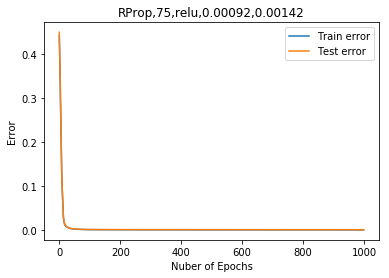

In [4]:
# class creation for neural network
class NN3(object):
    def __init__(self, d,h,c,activation):
        self.d = d
        self.h = h
        self.c = c
        self.activation = activation
        
        print("Network config:",self.d, self.h, self.c, self.activation)
    
        self.w1 = np.random.uniform(low=-0.5, high=0.5, size=(self.d, self.h))
        self.w2 = np.random.uniform(low=-0.5, high=0.5, size=(self.h, self.c))
    
    def sigmoid(self, z):
        return 1./(1.+np.exp(-z))
    
   
    def sigmoidprime(self,z):
        return np.exp(-z)/(1.+np.exp(-z)**2)
    
    def tanh(self,z):
        return np.tanh(z)
    
    def tanhprime(self,z):
        return 1.0 - np.tanh(z)**2
    
    def relu(self,z):
        return np.maximum(0,z)
    
    def reluprime(self,z):
        return np.where(z <= 0., 0., 1.)
    
    def forwardpass(self,X):
        self.z2 = np.dot(X, self.w1)
        if self.activation == "tanh":
            self.a2 = self.tanh(self.z2)
        if self.activation == "relu":
            self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.w2)
        return self.z3
           
    def costfunction(self,X,Y):
        self.Ypred = self.forwardpass(X)
        J = 0.5*np.sum((Y-self.Ypred)**2)
        return J
    
    def get_gradients(self,X,Yobv):
        self.Ypred = self.forwardpass(X)
        delta3 = self.Ypred-Yobv
        djdw2 = np.dot(self.a2.T, delta3)
        if self.activation == "tanh":
            delta2 = np.dot(delta3, self.w2.T)*self.tanhprime(self.z2)
        if self.activation == "relu":
            delta2 = np.dot(delta3, self.w2.T)*self.reluprime(self.z2)
        djdw1 = np.dot(X.T, delta2)
        return djdw1, djdw2    
        
# Initializations
NN = NN3(8,75,1,"relu")
max_iterations = 1000
iters = 0
train_error_vals = []
test_error_vals = []

alpha = 1.2
beta = 0.5
lr_max = 0.1
lr_min = 0.0000001

lr_w1 = 0.001*np.ones(NN.w1.shape)
lr_w2 = 0.001*np.ones(NN.w2.shape)

prev_dw1 = np.zeros(NN.w1.shape)
prev_dw2 = np.zeros(NN.w2.shape)

while (iters < max_iterations):
    
    # forwardpass and gradient caculation
    djdw1 = np.zeros(NN.w1.shape)
    djdw2 = np.zeros(NN.w2.shape)
    
    for i in range(len(traindata)):
        djdw1_i, djdw2_i = NN.get_gradients(np.array([X_traindata[i]]),
                                       np.array([Yobv_traindata[i]]))
        djdw1 = djdw1+djdw1_i
        djdw2 = djdw2+djdw2_i
        
    curr_dw1 = djdw1
    curr_dw2 = djdw2

    # updating w1 weights
    for i in range(curr_dw1.shape[0]):
        for j in range(curr_dw1.shape[1]):
            if (curr_dw1[i][j]) * (prev_dw1[i][j]) > 0:
                lr_w1[i][j] =  min([lr_w1[i][j] * alpha, lr_max])
                NN.w1[i][j] = NN.w1[i][j] - (np.sign(curr_dw1[i][j]) * lr_w1[i][j])
                prev_dw1[i][j] = curr_dw1[i][j]
                
            elif (curr_dw1[i][j]) * (prev_dw1[i][j]) < 0:
                lr_w1[i][j] =  max([lr_w1[i][j] * beta, lr_min])
                prev_dw1[i][j] = 0
            
            elif (curr_dw1[i][j]) * (prev_dw1[i][j]) == 0:
                NN.w1[i][j] = NN.w1[i][j] - (np.sign(curr_dw1[i][j]) * lr_w1[i][j])
                prev_dw1[i][j] = curr_dw1[i][j]
    
    # udation w2 weights
    for i in range(curr_dw2.shape[0]):
        for j in range(curr_dw2.shape[1]):
            if (curr_dw2[i][j]) * (prev_dw2[i][j]) > 0:
                lr_w2[i][j] =  min([lr_w2[i][j] * alpha, lr_max])
                NN.w2[i][j] = NN.w2[i][j] - (np.sign(curr_dw2[i][j]) * lr_w2[i][j])
                prev_dw2[i][j] = curr_dw2[i][j]
                
            elif (curr_dw2[i][j]) * (prev_dw2[i][j]) < 0:
                lr_w2[i][j] =  max([lr_w2[i][j] * beta, lr_min])
                prev_dw2[i][j] = 0
            
            elif (curr_dw2[i][j]) * (prev_dw2[i][j]) == 0:
                NN.w2[i][j] = NN.w2[i][j] - (np.sign(curr_dw2[i][j]) * lr_w2[i][j])
                prev_dw2[i][j] = curr_dw2[i][j]
    
    # error calculation
    train_error_sum = 0
    for i in range(len(traindata)):
        error = NN.costfunction(np.array([X_traindata[i]]),
                                 np.array([Yobv_traindata[i]]))
        train_error_sum = train_error_sum+error
    train_error_vals.append(train_error_sum/len(traindata))
    
    test_error_sum = 0
    for i in range(len(testdata)):
        error = NN.costfunction(np.array([X_testdata[i]]),
                                 np.array([Yobv_testdata[i]]))
        test_error_sum = test_error_sum+error
    test_error_vals.append(test_error_sum/len(testdata))
        
        
    iters = iters+1
    
print("Train MSE:",train_error_vals[-1])
print("Test MSE:",test_error_vals[-1])


#plotting error- epoch
f = plt.figure(0)
plt.title("RProp"+","+str(NN.h)+","+NN.activation+","+
          str(round(train_error_vals[-1],5))
          +","+str(round(test_error_vals[-1],5)))
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.plot(train_error_vals, label="Train error")
plt.plot(test_error_vals, label="Test error")
plt.legend()
f.show()

# Quick Prop

Update rule:

<img src="qp1.png">

('Network config:', 8, 75, 1, 'relu')
('learning rate:', 0.0001)
('Train MSE:', 0.24672875921750556)
('Test MSE:', 0.2689796924017715)


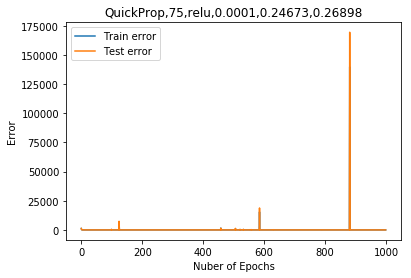

In [5]:
# creating class for neural network
class NN3(object):
    def __init__(self, d,h,c,activation):
        self.d = d
        self.h = h
        self.c = c
        self.activation = activation
        
        print("Network config:",self.d, self.h, self.c, self.activation)
    
        self.w1 = np.random.rand(self.d, self.h)
        self.w2 = np.random.rand(self.h, self.c)
    
    def sigmoid(self, z):
        return 1./(1.+np.exp(-z))
    
   
    def sigmoidprime(self,z):
        return np.exp(-z)/(1.+np.exp(-z)**2)
    
    def tanh(self,z):
        return np.tanh(z)
    
    def tanhprime(self,z):
        return 1.0 - np.tanh(z)**2
    
    def relu(self,z):
        return np.maximum(0,z)
    
    def reluprime(self,z):
        return np.where(z <= 0., 0., 1.)
    
    def forwardpass(self,X):
        self.z2 = np.dot(X, self.w1)
        #print("z2",self.z2.shape,self.z2)
        if self.activation == "tanh":
            self.a2 = self.tanh(self.z2)
        if self.activation == "relu":
            self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.w2)
        return self.z3
           
    def costfunction(self,X,Y):
        self.Ypred = self.forwardpass(X)
        J = 0.5*np.sum((Y-self.Ypred)**2)
        return J
    
    def get_gradients(self,X,Yobv):
        self.Ypred = self.forwardpass(X)
        delta3 = self.Ypred-Yobv
        djdw2 = np.dot(self.a2.T, delta3)
        if self.activation == "tanh":
            delta2 = np.dot(delta3, self.w2.T)*self.tanhprime(self.z2)
        if self.activation == "relu":
            delta2 = np.dot(delta3, self.w2.T)*self.reluprime(self.z2)
        djdw1 = np.dot(X.T, delta2)
        return djdw1, djdw2    
        
#initializations
NN = NN3(8,75,1,"relu")
learningrate = 0.0001
print("learning rate:",learningrate)
max_iterations = 1000
iters = 0
train_error_vals = []
test_error_vals = []

djdw1 = np.zeros(NN.w1.shape)
djdw2 = np.zeros(NN.w2.shape)

djdw1_prev = np.random.rand(NN.d, NN.h)
djdw2_prev = np.random.rand(NN.h, NN.c)

deltaw1_prev = np.ones(NN.w1.shape)
deltaw2_prev = np.ones(NN.w2.shape)

w1_prev = np.zeros(NN.w1.shape)
w2_prev = np.zeros(NN.w2.shape)

e1 = 1e-8*np.ones(NN.w1.shape)
e2 = 1e-8*np.ones(NN.w2.shape)

while (iters < max_iterations):
    #forward pass and gradient calculation
    djdw1 = np.zeros(NN.w1.shape)
    djdw2 = np.zeros(NN.w2.shape)
    
    for i in range(len(traindata)):
        djdw1_i, djdw2_i = NN.get_gradients(np.array([X_traindata[i]]),
                                       np.array([Yobv_traindata[i]]))
        djdw1 = djdw1+djdw1_i
        djdw2 = djdw2+djdw2_i
    
    # second order derivative approximaton
    sdw1 = djdw1/(e1+djdw1_prev - djdw1)
    sdw2 = djdw2/(e2+djdw2_prev - djdw2)
    
    djdw1_prev = djdw1
    djdw2_prev = djdw2
    
    deltaw1 = deltaw1_prev * sdw1
    deltaw2 = deltaw2_prev * sdw2
    
    deltaw1_prev = deltaw1
    deltaw2_prev = deltaw2
    
    w1_prev = NN.w1
    w2_prev = NN.w2
    
    # weight updation
    NN.w1 = NN.w1 + (learningrate*deltaw1)
    NN.w2 = NN.w2 + (learningrate*deltaw2)
    
    #Error
    train_error_sum = 0
    for i in range(len(traindata)):
        error = NN.costfunction(np.array([X_traindata[i]]),
                                 np.array([Yobv_traindata[i]]))
        train_error_sum = train_error_sum+error
    train_error_vals.append(train_error_sum/len(traindata))
    
    test_error_sum = 0
    for i in range(len(testdata)):
        error = NN.costfunction(np.array([X_testdata[i]]),
                                 np.array([Yobv_testdata[i]]))
        test_error_sum = test_error_sum+error
    test_error_vals.append(test_error_sum/len(testdata))
        
    iters = iters+1
    
    
# error-epoch graph
print("Train MSE:",train_error_vals[-1])
print("Test MSE:",test_error_vals[-1])

f = plt.figure(0)
plt.title("QuickProp"+","+str(NN.h)+","+NN.activation+","+
          str(learningrate)+","+
          str(round(train_error_vals[-1],5))
          +","+str(round(test_error_vals[-1],5)))
plt.xlabel("Nuber of Epochs")
plt.ylabel("Error")
plt.plot(train_error_vals, label="Train error")
plt.plot(test_error_vals, label="Test error")
plt.legend()
f.show()